##캐글러를 대상으로 한 설문조사

- 설문기간 : 2017년 8월 7일부터 8월 25일까지
- 평균 응답 시간은 16.4 분
- 171 개 국가 및 지역에서 16,716 명의 응답자
- 특정 국가 또는 지역에서 응답자가 50 명 미만인 경우 익명을 위해 그룹을 '기타'그룹으로 그룹화
- 설문 조사 시스템에 신고 된 응답자를 스팸으로 분류하거나 취업 상태에 관한 질문에 답변하지 않은 응답자는 제외(이 질문은 첫 번째 필수 질문이기에 응답하지 않으면 응답자가 다섯 번째 질문 이후 진행되지 않음)
- 대부분의 응답자는 이메일 목록, 토론 포럼 및 소셜 미디어 Kaggle 채널을 통해 설문을 알게 됨
- 급여데이터는 일부 통화에 대해서만 받고 해당 되는 통화에 기준하여 작성하도록 함
미국 달러로 급여를 계산할 수 있도록 USD로 환산 한 csv를 제공
- 질문은 선택적
- 모든 질문이 모든 응답자에게 보여지는 것은 아님
- 취업을 한 사람과 학생을 나누어 다른 질문을 함
- 응답자의 신원을 보호하기 위해 주관식과 객관식 파일로 분리
- 객관식과 자유 형식 응답을 맞추기 위한 키를 제공하지 않음
- 주관식 응답은 같은 행에 나타나는 응답이 반드시 동일한 설문 조사자가 제공하지 않도록 열 단위로 무작위 지정


## 데이터 파일

5 개의 데이터 파일을 제공

- schema.csv : 설문 스키마가있는 CSV 파일입니다. 이 스키마에는 multipleChoiceResponses.csv 및 freeformResponses.csv의 각 열 이름에 해당하는 질문이 포함되어 있습니다.
- multipleChoiceResponses.csv : 객관식 및 순위 질문에 대한 응답자의 답변, 각 행이 한 응답자의 응답
- freeformResponses.csv : Kaggle의 설문 조사 질문에 대한 응답자의 주관식 답변입니다. 임의로 지정되어 각 행이 같은 응답자를 나타내지 않음
- conversionRates.csv : R 패키지 "quantmod"에서 2017 년 9 월 14 일에 액세스 한 통화 변환율 (USD)
- RespondentTypeREADME.txt : schema.csv 파일의 "Asked"열에 응답을 디코딩하는 스키마입니다.

In [ ]:
# 노트북 안에서 그래프를 그리기 위해
%matplotlib inline

# import the standard python scientific libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# suppress deprecation and incorrect usage warings / warning 무시
import warnings
warnings.filterwarnings('ignore')



In [ ]:
question = pd.read_csv('/content/schema.csv')
question.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Column    290 non-null    object
 1   Question  290 non-null    object
 2   Asked     290 non-null    object
dtypes: object(3)
memory usage: 6.9+ KB


In [ ]:
question.head()

,Column,Question,Asked
0,GenderSelect,Select your gender identity. - Selected Choice,All
1,GenderFreeForm,Select your gender identity. - A different ide...,All
2,Country,Select the country you currently live in.,All
3,Age,What's your age?,All
4,EmploymentStatus,What's your current employment status?,All


In [ ]:
question.tail()

,Column,Question,Asked
285,JobFactorRemote,How are you assessing potential job opportunit...,Learners
286,JobFactorIndustry,How are you assessing potential job opportunit...,Learners
287,JobFactorLeaderReputation,How are you assessing potential job opportunit...,Learners
288,JobFactorDiversity,How are you assessing potential job opportunit...,Learners
289,JobFactorPublishingOpportunity,How are you assessing potential job opportunit...,Learners


In [ ]:
# 객관식 문제에 대한 응답을 가져옴
mcq = pd.read_csv('/content/multipleChoiceResponses.csv', encoding='ISO-8859-1', low_memory=False)
mcq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16716 entries, 0 to 16715
Columns: 228 entries, GenderSelect to JobFactorPublishingOpportunity
dtypes: float64(13), object(215)
memory usage: 29.1+ MB


In [ ]:
mcq.shape

(16716, 228)

In [ ]:
mcq.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

In [ ]:
mcq.head(10)

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,PublicDatasetsSelect,LearningPlatformSelect,LearningPlatformUsefulnessArxiv,LearningPlatformUsefulnessBlogs,LearningPlatformUsefulnessCollege,LearningPlatformUsefulnessCompany,LearningPlatformUsefulnessConferences,LearningPlatformUsefulnessFriends,LearningPlatformUsefulnessKaggle,LearningPlatformUsefulnessNewsletters,LearningPlatformUsefulnessCommunities,LearningPlatformUsefulnessDocumentation,LearningPlatformUsefulnessCourses,LearningPlatformUsefulnessProjects,LearningPlatformUsefulnessPodcasts,LearningPlatformUsefulnessSO,LearningPlatformUsefulnessTextbook,LearningPlatformUsefulnessTradeBook,LearningPlatformUsefulnessTutoring,LearningPlatformUsefulnessYouTube,BlogsPodcastsNewslettersSelect,LearningDataScienceTime,JobSkillImportanceBigData,JobSkillImportanceDegree,JobSkillImportanceStats,JobSkillImportanceEnterpriseTools,...,WorkChallengeFrequencyITCoordination,WorkChallengeFrequencyHiringFunds,WorkChallengeFrequencyPrivacy,WorkChallengeFrequencyScaling,WorkChallengeFrequencyEnvironments,WorkChallengeFrequencyClarity,WorkChallengeFrequencyDataAccess,WorkChallengeFrequencyOtherSelect,WorkDataVisualizations,WorkInternalVsExternalTools,WorkMLTeamSeatSelect,WorkDatasets,WorkDatasetsChallenge,WorkDataStorage,WorkDataSharing,WorkDataSourcing,WorkCodeSharing,RemoteWork,CompensationAmount,CompensationCurrency,SalaryChange,JobSatisfaction,JobSearchResource,JobHuntTime,JobFactorLearning,JobFactorSalary,JobFactorOffice,JobFactorLanguages,JobFactorCommute,JobFactorManagement,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,Employed by a company that doesn't perform adv...,SAS Base,Random Forests,F#,Dataset aggregator/platform (i.e. Socrata/Kagg...,"College/University,Conferences,Podcasts,Trade ...",NaN,NaN,NaN,NaN,Very useful,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Very useful,NaN,NaN,Somewhat useful,NaN,NaN,"Becoming a Data Scientist Podcast,Data Machina...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Often,Most of the time,NaN,NaN,NaN,NaN,26-50% of projects,Do not know,Standalone Team,NaN,NaN,Document-oriented (e.g. MongoDB/Elasticsearch)...,"Company Developed Platform,I don't typically s...",NaN,"Mercurial,Subversion,Other",Always,NaN,NaN,I am not currently employed,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,Random Forests,Python,Dataset aggregator/platform (i.e. Socrata/Kagg...,Kaggle,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat useful,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Becoming a Data Scientist Podcast,Siraj Raval ...",1-2 years,NaN,Nice to have,Unnecessary,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Amazon Web services,Deep learning,R,Dataset aggregator/platform (i.e. Socrata/Kagg...,"Arxiv,College/University,Kaggle,Online courses...",Very useful,NaN,Somewhat useful,NaN,NaN,NaN,Somewhat useful,NaN,NaN,NaN,Very useful,NaN,NaN,NaN,NaN,NaN,NaN,Very useful,"FastML Blog,No Free Hunch Blog,Talking Machine...",1-2 years,Necessary,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Asking friends, family members, or former coll...",1-2,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Impor

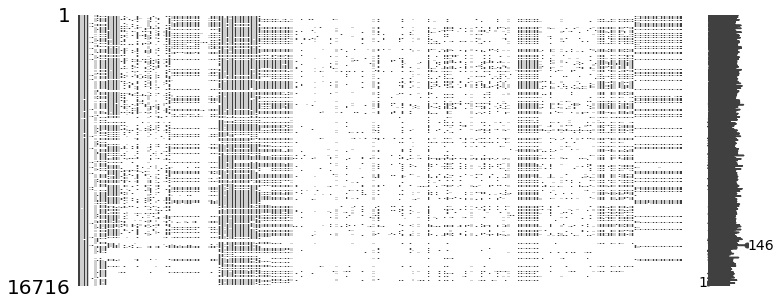

In [ ]:
# missingno 는 NaN 데이터들에 대해 시각화를 해준다.
# NaN 데이터의 컬럼이 많아 아래 그래프 만으로는 내용을 파악하기 힘들다.

import missingno as msno

msno.matrix(mcq, figsize=(12,5))

## 설문 통계

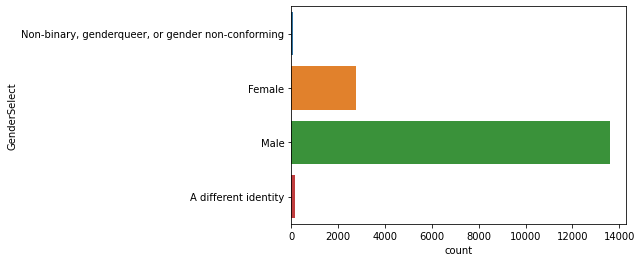

In [ ]:
# 성별
sns.countplot(y='GenderSelect', data=mcq)
# mcq 데이터프레임에서 GenderSelect의 count 별 그래프를 나타냄
# 여성보다 남성의 설문 응답의 수가 더 많음

In [ ]:
# 국가별 응답수
con_df = pd.DataFrame(mcq['Country'].value_counts())
con_df
# mcq의 country 컬럼의 value들의 counts를 세어 데이터프레임을 만들어준다,

,Country
United States,4197
India,2704
Other,1023
Russia,578
United Kingdom,535
People 's Republic of China,471
Brazil,465
Germany,460
France,442
Canada,440


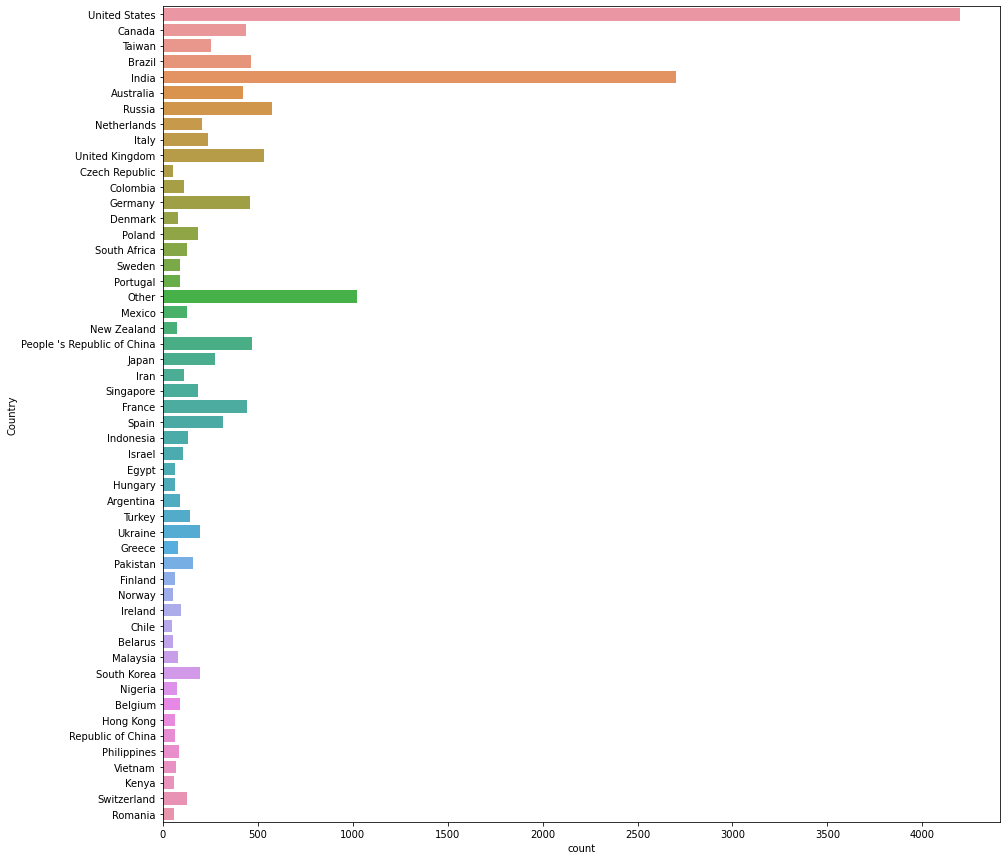

In [ ]:
plt.figure(figsize=(15,15))
sns.countplot(y='Country', data=mcq)

In [ ]:
con_df['국가'] = con_df.index

con_df
# 국가 컬럼을 만들어줌

,Country,국가
United States,4197,United States
India,2704,India
Other,1023,Other
Russia,578,Russia
United Kingdom,535,United Kingdom
People 's Republic of China,471,People 's Republic of China
Brazil,465,Brazil
Germany,460,Germany
France,442,France
Canada,440,Canada


In [ ]:
con_df.columns = ['응답 수', '국가']
con_df.head()
# 컬럼 명을 응답 수와 국가로 변경해줌

,응답 수,국가
United States,4197,United States
India,2704,India
Other,1023,Other
Russia,578,Russia
United Kingdom,535,United Kingdom


In [ ]:
# index 컬럼을 삭제하고 순위를 알기 위해서 reset_index()를 해준다.
# 우리나라는 18위이고 전체 52개국 중에서 20위까지만 확인한다.
con_df = con_df.reset_index().drop('index', axis=1)

con_df.head(20)

,응답 수,국가
0,4197,United States
1,2704,India
2,1023,Other
3,578,Russia
4,535,United Kingdom
5,471,People 's Republic of China
6,465,Brazil
7,460,Germany
8,442,France
9,440,Canada


In [ ]:
# Age 컬럼에 대한 정보를 본다. 
mcq['Age'].describe()

# 평균 연령, 최대, 최소 연령

count    16385.000000
mean        32.372841
std         10.473487
min          0.000000
25%         25.000000
50%         30.000000
75%         37.000000
max        100.000000
Name: Age, dtype: float64

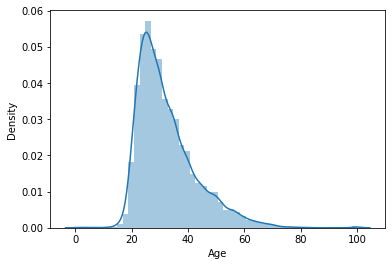

In [ ]:
sns.distplot(mcq[mcq['Age'] > 0]['Age'])

응답자의 대부분이 어리고, 20대부터 급격히 늘어나며 30대가 가장 많다.</br>
평균 나이는 32세이다.

##학력

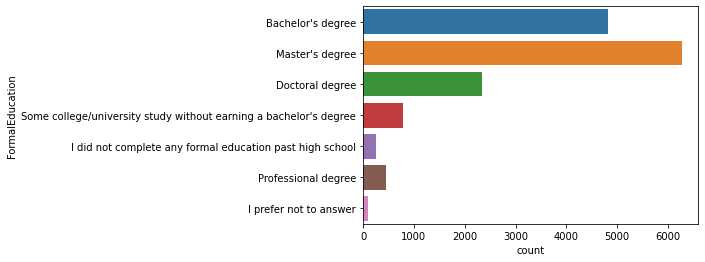

In [ ]:
sns.countplot(y='FormalEducation', data=mcq)

응답자 중 master's degree(석사학위)가 가장 많았고 bachelor's degree(학사학위)가 그 뒤를 잇고 Doctoral degree(박사학위)가 세번째를 이었다.

##전공

In [ ]:
pd.DataFrame(
    mcq['MajorSelect'].value_counts())


,MajorSelect
Computer Science,4397
Mathematics or statistics,2220
Engineering (non-computer focused),1339
Electrical Engineering,1303
Other,848
Physics,830
"Information technology, networking, or system administration",693
A social science,531
Biology,274
Management information systems,237


## 전공

In [ ]:
# .value_counts()를 이용하면 그룹화 된 데이터의 count 값을 보여준다.
# namalize= True 옵션을 사용하면, 해당 데이터에서 어느정도의 비율을 차지하는지 알 수 있다.

mcq_major_count = pd.DataFrame(
    mcq['MajorSelect'].value_counts()
)

mcq_major_percent = pd.DataFrame(
    mcq['MajorSelect'].value_counts(normalize=True)
)

mcq_major_df = mcq_major_count.merge(
    mcq_major_percent, left_index= True, right_index= True
)
mcq_major_df.columns = ['응답 수', '비율']


In [ ]:
mcq_major_df

,응답 수,비율
Computer Science,4397,0.331074
Mathematics or statistics,2220,0.167156
Engineering (non-computer focused),1339,0.100821
Electrical Engineering,1303,0.098110
Other,848,0.063851
Physics,830,0.062495
"Information technology, networking, or system administration",693,0.052180
A social science,531,0.039982
Biology,274,0.020631
Management information systems,237,0.017845


컴퓨터 과학 전공자들이 33%를 차지할 정도로 많고 수리통계, 공학. 전기 공학자들이 뒤를 이었다.

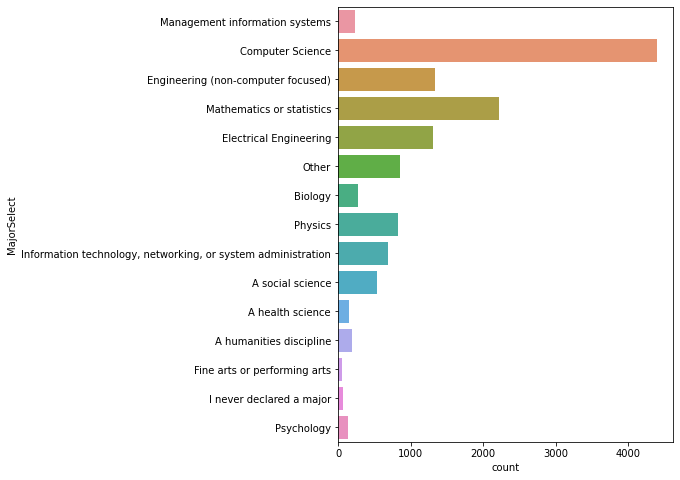

In [ ]:
plt.figure(figsize=(6, 8))
sns.countplot(y='MajorSelect', data=mcq)

## 취업여부

In [ ]:
mcq_es_count = pd.DataFrame(
    mcq['EmploymentStatus'].value_counts()
)
mcq_es_percent = pd.DataFrame(
    mcq['EmploymentStatus'].value_counts(normalize=True)
)
mcq_es_df = mcq_es_count.merge(
    mcq_es_percent, left_index=True, right_index=True
)
mcq_es_df.columns = ['응답 수', '비율']

In [ ]:
mcq_es_df

,응답 수,비율
Employed full-time,10897,0.651890
"Not employed, but looking for work",2110,0.126226
"Independent contractor, freelancer, or self-employed",1330,0.079564
"Not employed, and not looking for work",924,0.055276
Employed part-time,917,0.054858
I prefer not to say,420,0.025126
Retired,118,0.007059


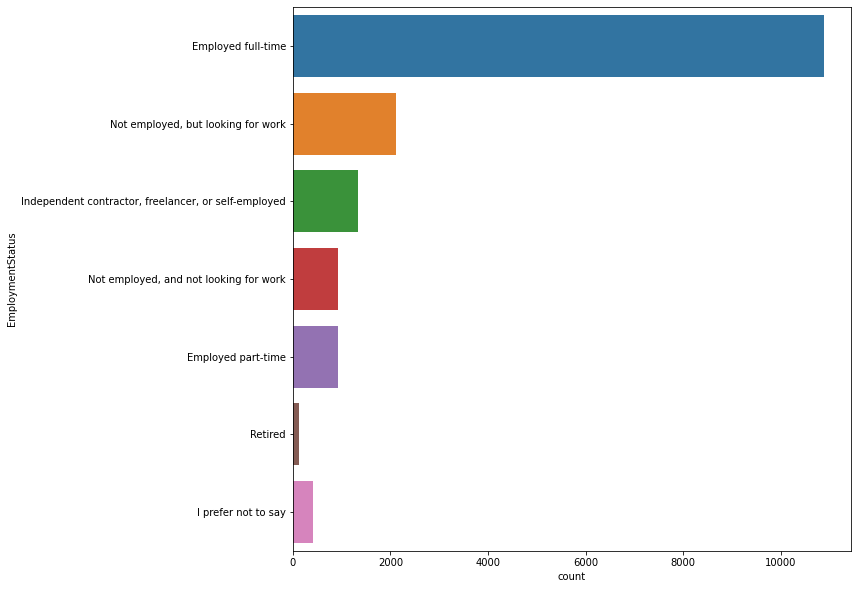

In [ ]:
plt.figure(figsize=(10, 10))
sns.countplot(y='EmploymentStatus', data=mcq)

Employed full-time가 65% 를 차지할 정도로 가장 많았고 Not employed, but looking for work가 그 뒤로 가장 많았다.

## 프로그래밍 경험

'Tenure'항목은 데이터사이언스 분야에서 코딩 경험이 얼마나 되는지에 대한 질문이다.</br>



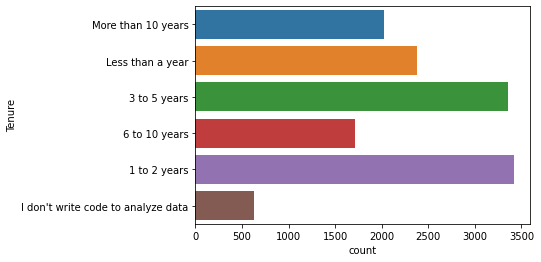

In [ ]:
sns.countplot(y='Tenure', data=mcq)

특히 1 ~ 2년의 경험을 가진 사람들이 많았고 그 뒤로 3 ~ 5년의 경험을 가진 사람들이 많았다.

## 한국

The number of interviewees in Korea is 194


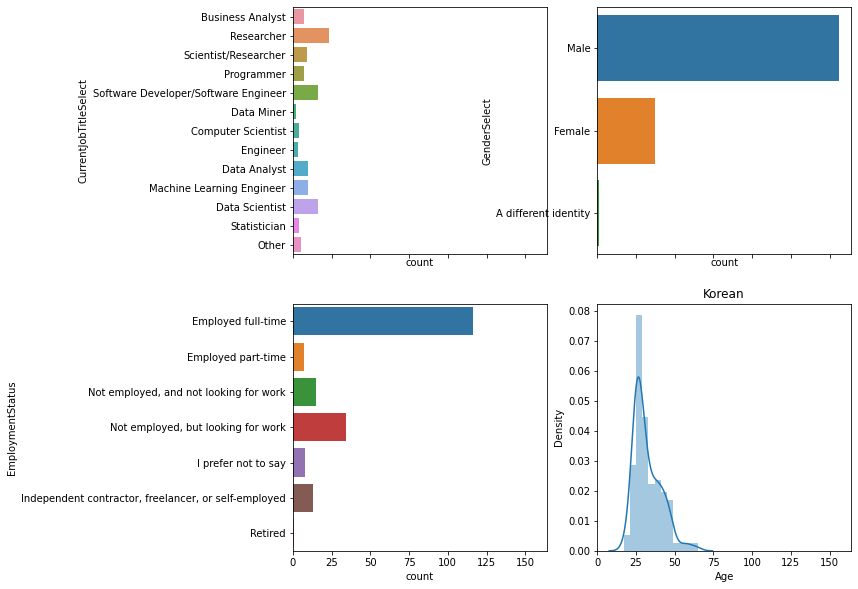

In [ ]:
korea = mcq.loc[mcq['Country'] == 'South Korea']

print('The number of interviewees in Korea is', str(korea.shape[0]))


f,axes = plt.subplots(2, 2, figsize=(10,10), sharex=True)
sns.countplot(y='GenderSelect', data=korea, ax=axes[0,1])
sns.countplot(y='EmploymentStatus', data=korea, ax=axes[1,0])
sns.countplot(y='CurrentJobTitleSelect', data=korea, ax=axes[0,0])
sns.distplot(korea['Age'].dropna(), ax=axes[1,1])
plt.title('Korean')
plt.show()

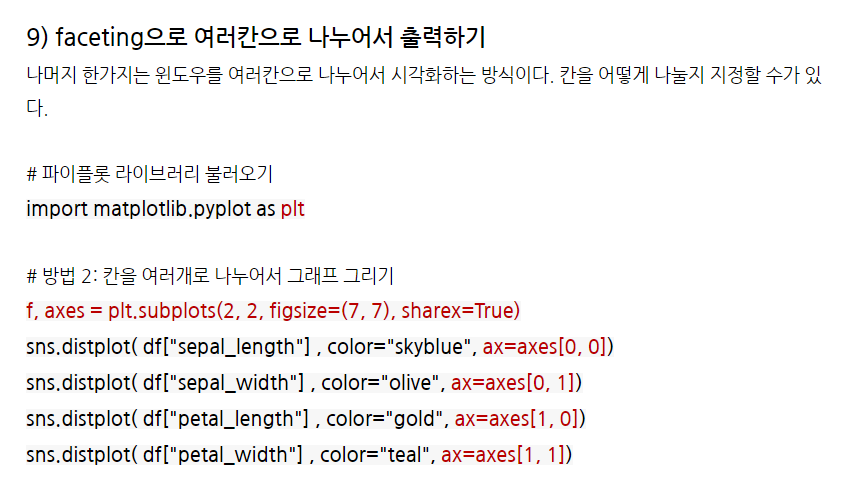

Text(0.5, 1.0, 'Korean male')

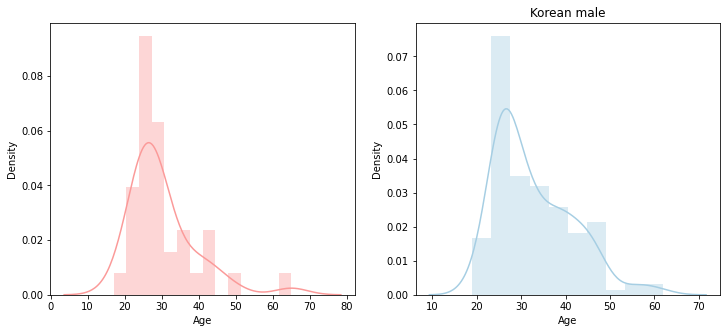

In [ ]:
figure, (ax1, ax2) = plt.subplots(ncols=2)

figure.set_size_inches(12, 5)
sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Female'].dropna(),
             norm_hist=False, color= sns.color_palette('Paired')[4], ax= ax1)
plt.title('Korean Female')

sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Male'].dropna(),
             norm_hist=False, color= sns.color_palette('Paired')[0], ax= ax2)
plt.title('Korean male')

# korea 데이터 프레임에서 age 컬럼을 뽑고 GenderSelect가 male or female인 행들만 추출한다.


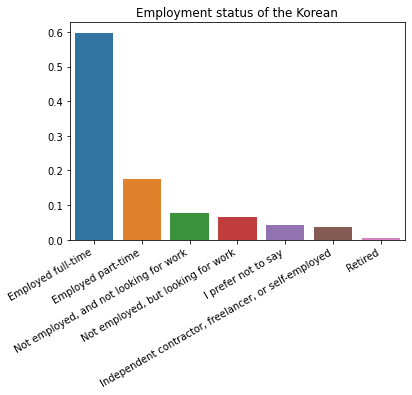

In [ ]:
sns.barplot(x=korea['EmploymentStatus'].unique(), y=korea['EmploymentStatus'].value_counts()/len(korea))
plt.xticks(rotation=30, ha='right')
plt.title('Employment status of the Korean')
plt.ylabel('')
plt.show()

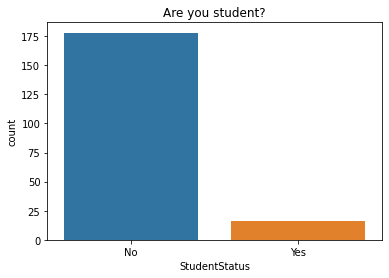

In [ ]:
korea['StudentStatus'] = korea['StudentStatus'].fillna('No')
sns.countplot(x='StudentStatus', data=korea)
plt.title('Are you student?')
plt.show()


In [ ]:
full_time = mcq.loc[mcq['EmploymentStatus'] == 'Employed full-time']
print(full_time.shape)

look_for_job = mcq.loc[mcq['EmploymentStatus'] == 'Not employed, but looking for work']
print(look_for_job.shape)

(10897, 228)
(2110, 228)


자주 묻는 질문 FAQ
- 초보자들이 묻는 가장 일반적인 질문에 대한 답을 시각화 해본다.

# Q1. python과 R 중에서 어떤 언어를 배워야 할까요?

In [5]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [6]:
question = pd.read_csv('/content/schema.csv')
question.head()

,Column,Question,Asked
0,GenderSelect,Select your gender identity. - Selected Choice,All
1,GenderFreeForm,Select your gender identity. - A different ide...,All
2,Country,Select the country you currently live in.,All
3,Age,What's your age?,All
4,EmploymentStatus,What's your current employment status?,All


In [7]:
question.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Column    290 non-null    object
 1   Question  290 non-null    object
 2   Asked     290 non-null    object
dtypes: object(3)
memory usage: 6.9+ KB


In [10]:
mcq = pd.read_csv('/content/multipleChoiceResponses.csv', encoding="ISO-8859-1", low_memory=False)
mcq.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,PublicDatasetsSelect,LearningPlatformSelect,LearningPlatformUsefulnessArxiv,LearningPlatformUsefulnessBlogs,LearningPlatformUsefulnessCollege,LearningPlatformUsefulnessCompany,LearningPlatformUsefulnessConferences,LearningPlatformUsefulnessFriends,LearningPlatformUsefulnessKaggle,LearningPlatformUsefulnessNewsletters,LearningPlatformUsefulnessCommunities,LearningPlatformUsefulnessDocumentation,LearningPlatformUsefulnessCourses,LearningPlatformUsefulnessProjects,LearningPlatformUsefulnessPodcasts,LearningPlatformUsefulnessSO,LearningPlatformUsefulnessTextbook,LearningPlatformUsefulnessTradeBook,LearningPlatformUsefulnessTutoring,LearningPlatformUsefulnessYouTube,BlogsPodcastsNewslettersSelect,LearningDataScienceTime,JobSkillImportanceBigData,JobSkillImportanceDegree,JobSkillImportanceStats,JobSkillImportanceEnterpriseTools,...,WorkChallengeFrequencyITCoordination,WorkChallengeFrequencyHiringFunds,WorkChallengeFrequencyPrivacy,WorkChallengeFrequencyScaling,WorkChallengeFrequencyEnvironments,WorkChallengeFrequencyClarity,WorkChallengeFrequencyDataAccess,WorkChallengeFrequencyOtherSelect,WorkDataVisualizations,WorkInternalVsExternalTools,WorkMLTeamSeatSelect,WorkDatasets,WorkDatasetsChallenge,WorkDataStorage,WorkDataSharing,WorkDataSourcing,WorkCodeSharing,RemoteWork,CompensationAmount,CompensationCurrency,SalaryChange,JobSatisfaction,JobSearchResource,JobHuntTime,JobFactorLearning,JobFactorSalary,JobFactorOffice,JobFactorLanguages,JobFactorCommute,JobFactorManagement,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,Employed by a company that doesn't perform adv...,SAS Base,Random Forests,F#,Dataset aggregator/platform (i.e. Socrata/Kagg...,"College/University,Conferences,Podcasts,Trade ...",NaN,NaN,NaN,NaN,Very useful,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Very useful,NaN,NaN,Somewhat useful,NaN,NaN,"Becoming a Data Scientist Podcast,Data Machina...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Often,Most of the time,NaN,NaN,NaN,NaN,26-50% of projects,Do not know,Standalone Team,NaN,NaN,Document-oriented (e.g. MongoDB/Elasticsearch)...,"Company Developed Platform,I don't typically s...",NaN,"Mercurial,Subversion,Other",Always,NaN,NaN,I am not currently employed,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,Random Forests,Python,Dataset aggregator/platform (i.e. Socrata/Kagg...,Kaggle,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat useful,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Becoming a Data Scientist Podcast,Siraj Raval ...",1-2 years,NaN,Nice to have,Unnecessary,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Amazon Web services,Deep learning,R,Dataset aggregator/platform (i.e. Socrata/Kagg...,"Arxiv,College/University,Kaggle,Online courses...",Very useful,NaN,Somewhat useful,NaN,NaN,NaN,Somewhat useful,NaN,NaN,NaN,Very useful,NaN,NaN,NaN,NaN,NaN,NaN,Very useful,"FastML Blog,No Free Hunch Blog,Talking Machine...",1-2 years,Necessary,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Asking friends, family members, or former coll...",1-2,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Impor

In [12]:
mcq.shape

(16716, 228)

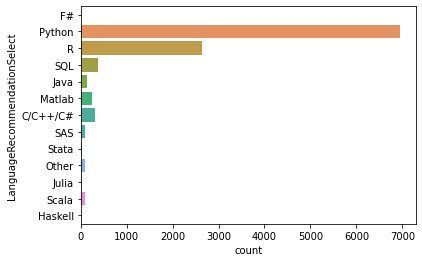

In [13]:
sns.countplot(y='LanguageRecommendationSelect', data=mcq)

파이썬을 명확하게 선호하고 있음을 알 수 있음

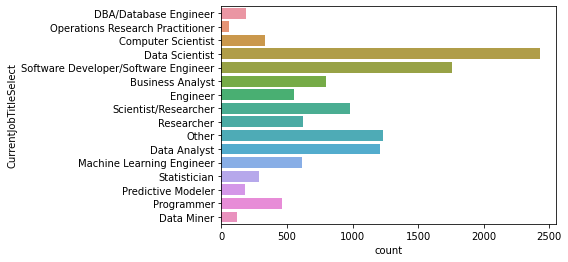

In [14]:
# 현재 하고 있는 일

sns.countplot(y='CurrentJobTitleSelect', data=mcq)

data scientist가 가장 많고 그 뒤로 software developer와 data analyst가 뒤를 잇는다.

In [20]:
# 현재 하고 있는 일에 대한 전체 응답수

mcq[mcq['CurrentJobTitleSelect'].notnull()]['CurrentJobTitleSelect'].shape


# mcq[mcq['CurrentJobTitleSelect'].notnull()] 은 CurrentJobTitleSelect에서 null값이 없는 값들만 가져온다.
# mcq[mcq['CurrentJobTitleSelect'].notnull()]['CurrentJobTitleSelect'].shape 를 붙여주어 null값이 없는 CurrentJobTitleSelect의 shape을 도출한다.

(11830,)

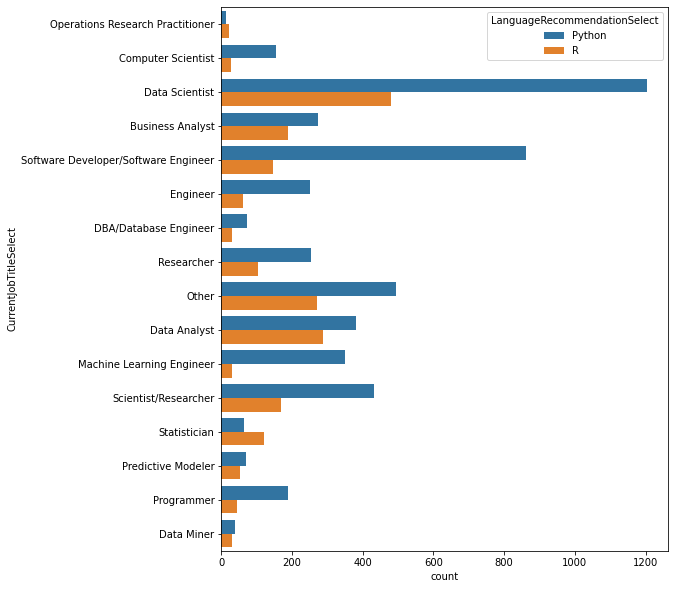

In [30]:
# 현재 하고있는 일에 대한 응답을 해준 사람 중 python과 r을 사용하는 사람 알아보기
# 응답자들이 실제 업무에서 어떤 언어를 주로 사용하는 지 알아볼 수 있다.

data = mcq[(mcq['CurrentJobTitleSelect'].notnull()) & 
           ((mcq['LanguageRecommendationSelect'] == 'Python') |
           (mcq['LanguageRecommendationSelect'] == 'R'))]

# mcq['CurrentJobTitleSelect'].notnull() = CurrentJobTitleSelect에서 널값이 없는 값만 추출하고 그 중에서
# (mcq['LanguageRecommendationSelect'] == 'Python') | (mcq['LanguageRecommendationSelect'] == 'R') - LanguageRecommendationSelect에서 파이썬 또는 R 값을 추출

data.shape

plt.figure(figsize=(8, 10))

sns.countplot(y='CurrentJobTitleSelect', hue='LanguageRecommendationSelect', data=data)
# hue 옵션을 사용하여 파이썬과 r을 구분지어 보여준다.

현재 하고 있는 일 응답자 중에서 data scientist들은 python을 압도적으로 많이 사용한다. </br>
대부분의 직업에서 python이 많이 사용되며 통계학자의 경우 R이 더 많이 사용된다.

# Q2 데이터 사이언스 분야에서 앞으로 크게 주목받을 것은 무엇일까요?
- 관련 분야 종사자가 아니더라도 빅데이터, 딥러닝, 뉴럴네트워크 같은 용어에 대해 알고있다.
- 응답자들이 내년에 가장 흥미로운 기술이 될 것이라고 응답한 것이다.

### 데이터 사이언스 툴

In [33]:
mcq_ml_tool_count = pd.DataFrame(
    mcq['MLToolNextYearSelect'].value_counts())

mcq_ml_tool_percent = pd.DataFrame(
    mcq['MLToolNextYearSelect'].value_counts(normalize=True))

mcq_ml_tool_df = mcq_ml_tool_count.merge(
    mcq_ml_tool_percent, left_index=True, right_index=True).head(20)

mcq_ml_tool_df.columns = ['응답 수', '비율']

mcq_ml_tool_df

,응답 수,비율
TensorFlow,2621,0.238316
Python,1713,0.155756
R,910,0.082742
Spark / MLlib,755,0.068649
Hadoop/Hive/Pig,417,0.037916
Other,407,0.037007
Amazon Machine Learning,392,0.035643
Jupyter notebooks,358,0.032551
I don't plan on learning a new tool/technology,341,0.031006
Google Cloud Compute,296,0.026914


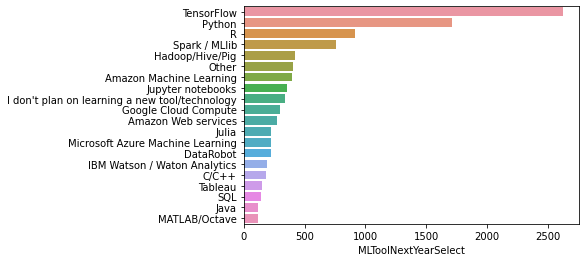

In [35]:
data = mcq['MLToolNextYearSelect'].value_counts().head(20)

sns.barplot(y=data.index, x=data)

구글의 딥러닝 프레임워크인 Tensorflow가 23%로 가장 많은 관심을 받을 것이라고 예상함 </br>
그 뒤로 python과 r이 뒤를 이었다.

## 다음 해에 주목할 만한 Data Science Methods

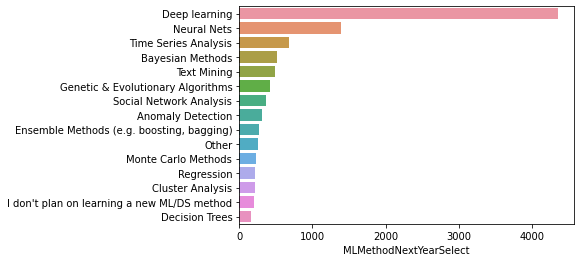

In [37]:
data = mcq['MLMethodNextYearSelect'].value_counts().head(15)

data

sns.barplot(y=data.index, x=data)

다음 해에 Deep Learning이 가장 주목할 만하고 그 뒤로 신경망, 시계열분석, 베이지안, 텍스트 마이닝 등이 주목할 만하다고 답했다. 

#Q3 어딩서 데이터 사이언스를 배워야 할까요?

In [45]:
mcq['LearningPlatformSelect'] = mcq['LearningPlatformSelect'].astype('str').apply(lambda x: x.split(','))
# mcq['LearningPlatformSelect'] 의 타입을 str로 바꾸고 apply(lambda x: x.split(',')) 를 이용하여 콤마를 기준으로 구분지었다.

s = mcq.apply(
    lambda x: pd.Series(x['LearningPlatformSelect']),
    axis=1).stack().reset_index(level=1, drop=True)

s.name = 'platform'


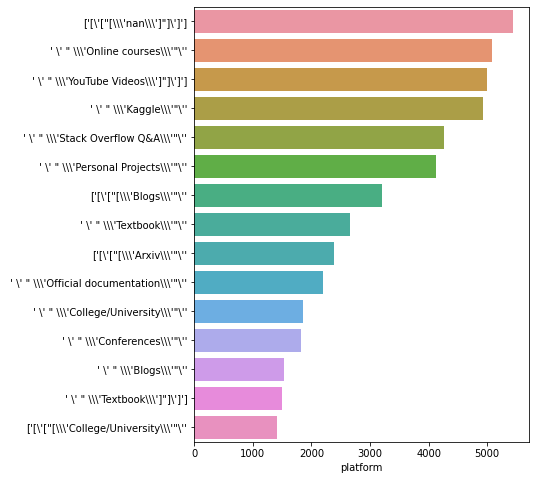

In [48]:
plt.figure(figsize=(6, 8))
data = s[s != 'nan'].value_counts().head(15)
sns.barplot(y=data.index, x=data)

In [52]:
# 설문내용과 누구에게 물어봤는지 알아보기

qc = question.loc[question['Column'].str.contains('LearningCategory')]
print(qc.shape)
qc

(7, 3)


,Column,Question,Asked
91,LearningCategorySelftTaught,What percentage of your current machine learni...,All
92,LearningCategoryOnlineCourses,What percentage of your current machine learni...,All
93,LearningCategoryWork,What percentage of your current machine learni...,All
94,LearningCategoryUniversity,What percentage of your current machine learni...,All
95,LearningCategoryKaggle,What percentage of your current machine learni...,All
96,LearningCategoryOther,What percentage of your current machine learni...,All
97,LearningCategoryOtherFreeForm,What percentage of your current machine learni...,All


In [57]:
use_features = [x for x in mcq.columns if x.find('LearningPlatformUsefulness') != -1]

use_features

['LearningPlatformUsefulnessArxiv',
 'LearningPlatformUsefulnessBlogs',
 'LearningPlatformUsefulnessCollege',
 'LearningPlatformUsefulnessCompany',
 'LearningPlatformUsefulnessConferences',
 'LearningPlatformUsefulnessFriends',
 'LearningPlatformUsefulnessKaggle',
 'LearningPlatformUsefulnessNewsletters',
 'LearningPlatformUsefulnessCommunities',
 'LearningPlatformUsefulnessDocumentation',
 'LearningPlatformUsefulnessCourses',
 'LearningPlatformUsefulnessProjects',
 'LearningPlatformUsefulnessPodcasts',
 'LearningPlatformUsefulnessSO',
 'LearningPlatformUsefulnessTextbook',
 'LearningPlatformUsefulnessTradeBook',
 'LearningPlatformUsefulnessTutoring',
 'LearningPlatformUsefulnessYouTube']

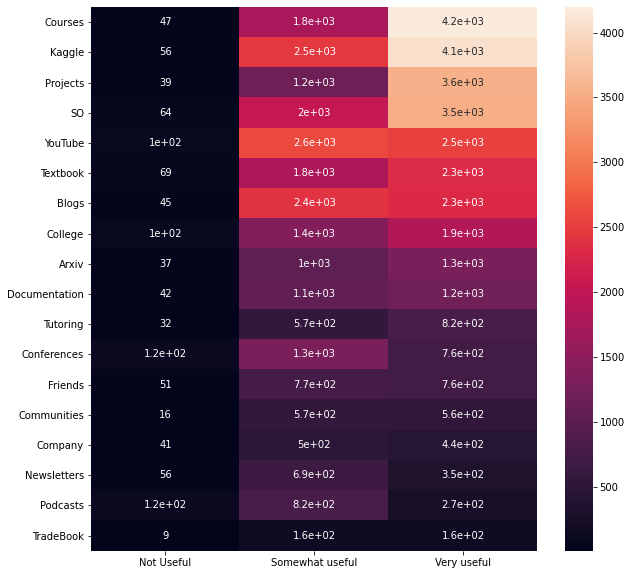

In [65]:
# 학습플랫폼과 유용함에 대한 연관성을 살펴보기

fdf = {}

for feature in use_features:
  a = mcq[feature].value_counts()
  fdf[feature[len('LearningPlatformUsefulness'): ]] = a

fdf = pd.DataFrame(fdf).transpose().sort_values('Very useful', ascending=False)

# 학습플랫폼들이 얼마나 유용한지에 대한 상관관계를 그려보기
plt.figure(figsize=(10, 10))
sns.heatmap(
    fdf.sort_values('Very useful', ascending=False), annot=True)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text major ticklabel objects>)

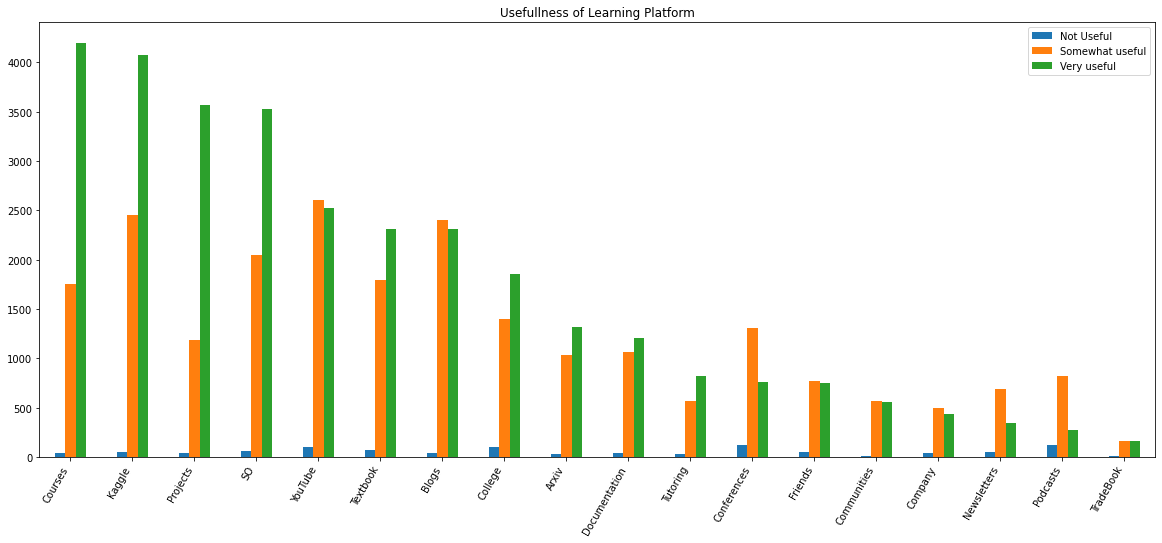

In [66]:
# 유용함의 정도를 각 플랫폼 별로 그룹화해 나타내기

fdf.plot(kind='bar', figsize=(20, 8),
         title='Usefullness of Learning Platform')
plt.xticks(rotation=60, ha='right')

courses, kaggle, projects, SO, youtube가 도움이 많이 되는 편이라고 응답하였다

In [67]:
cat_features = [x for x in mcq.columns if x.find('LearningCategory') != -1]

cat_features

['LearningCategorySelftTaught',
 'LearningCategoryOnlineCourses',
 'LearningCategoryWork',
 'LearningCategoryUniversity',
 'LearningCategoryKaggle',
 'LearningCategoryOther']

In [69]:
cdf = {}

for feature in cat_features:
  cdf[feature[len('LearningCategory'):]] = mcq[feature].mean()

# 파이차트를 그리기 위한 평균값을 구해서 담아주기

cdf = pd.Series(cdf)
cdf

SelftTaught      33.366771
OnlineCourses    27.375514
Work             15.217593
University       16.988607
Kaggle            5.531434
Other             1.795940
dtype: float64

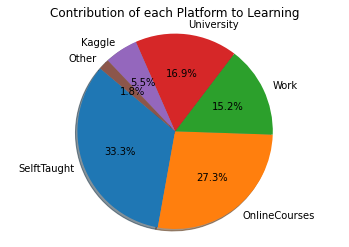

In [71]:
# 학습플랫폼 별 도움이 되는 정도를 그려보기
plt.pie(cdf, labels=cdf.index,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Contribution of each Platform to Learning')
plt.show()

개인 프로젝트를 해보는 것이 가장 큰 도움이 되었으며, 온라인 코스와 대학, 업무 그 다음으로 캐글을 통해 배웠다고 응답했다.

# Q4 데이터 과학을 위해 높은 사양의 컴퓨터가 필요한가요?


In [72]:
# 설문 내용과 누구에게 물어봤는지를 찾아보기
qc = question.loc[question['Column'].str.contains('HardwarePersonalProjectsSelect')]
print(qc.shape)
qc

(1, 3)


,Column,Question,Asked
74,HardwarePersonalProjectsSelect,Which computing hardware do you use for your p...,Learners


In [73]:
mcq[mcq['HardwarePersonalProjectsSelect'].notnull()]['HardwarePersonalProjectsSelect'].shape

# 널값을 제외한 HardwarePersonalProjectsSelect에 대한 질문의 응답은 4206건이다.

(4206,)

In [74]:
mcq['HardwarePersonalProjectsSelect'] = mcq['HardwarePersonalProjectsSelect'].astype('str').apply(lambda x: x.split(','))

s = mcq.apply(lambda x: pd.Series(x['HardwarePersonalProjectsSelect']), axis=1).stack().reset_index(level=1, drop=True)

s.name = 'hardware'

In [75]:
s = s[s != 'nan']

In [76]:
pd.DataFrame(s.value_counts())

,hardware
Basic laptop (Macbook),2246
Azure,669
GCE ...),669
Laptop + Cloud service (AWS,669
Gaming Laptop (Laptop + CUDA capable GPU),641
Traditional Workstation,527
Laptop or Workstation and local IT supported servers,445
GPU accelerated Workstation,416
Workstation + Cloud service,174
Other,147


맥북을 사용하는 응답자가 가장 많았고 랩탑과 함께 클라우드를 사용하는 사람들이 그 다음을 차지하였음</br>
적당한 GPU를 가진 게임용 노트북을 사용하는 사례가 그 다음임

#Q5 데이터 사이언스 공부에 얼마나 많은 시간을 사용하는지?

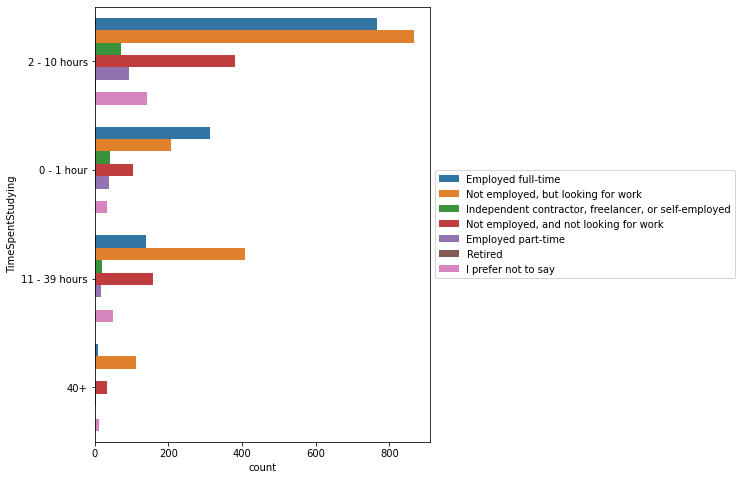

In [81]:
plt.figure(figsize=(6, 8))
sns.countplot(y= 'TimeSpentStudying',
              data=mcq,
              hue='EmploymentStatus').legend(loc='center left', bbox_to_anchor=(1, 0.5))

# .legend(loc='center left', bbox_to_anchor=(1, 0.5))은 범례를 보여주고 위치를 조정하는 역할을 함

모두 2 ~ 10시간 공부하는 사람들이 가장 많고 11 ~ 39시간에서 구직자가 가장 많다.</br>

하지만 응답자 중 대부분이 풀타임으로 일하는 사람들이라는 점을 고려해봐야 한다. 

In [83]:
full_time = mcq.loc[(mcq['EmploymentStatus'] == 'Employed full-time')]
print(full_time.shape)

looking_for_job = mcq.loc[(
    mcq['EmploymentStatus'] == 'Not employed, but looking for work'
)]
print(looking_for_job.shape)

(10897, 228)
(2110, 228)


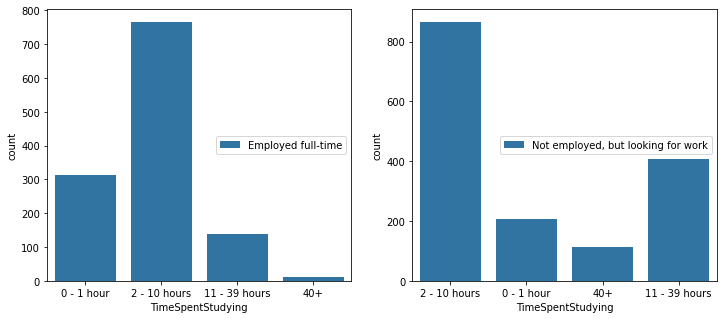

In [85]:
figuer, (ax1, ax2) = plt.subplots(ncols=2)

figuer.set_size_inches(12, 5)
sns.countplot(x = 'TimeSpentStudying',
              data=full_time,
              hue='EmploymentStatus',
              ax=ax1).legend(loc='center right',
                              bbox_to_anchor=(1,0.5))
              
sns.countplot(x = 'TimeSpentStudying',
              data=looking_for_job,
              hue='EmploymentStatus',
              ax=ax2).legend(loc='center right',
                              bbox_to_anchor=(1,0.5))